<br>
<center><img title="PROMISE" src="https://drive.google.com/uc?id=1mkkRuqmsPouCu2tnd6o_YwbdGgXMHN5o" height=125px></center>


---
# <center> <b>Deep Learning - Red neuronal convolucional (CNN)</b> </center>
---

<br>
<br>
En este entregable vamos a trabajar con los conjuntos de datos MNIST y CIFAR10 que utilizaste en el entregable anterior. Es importante que tengas en mente lo que has aprendido en el entregable anterior de MLP: por ejemplo, qué significa one-hot encoding (se utiliza la función de pérdidas categorical_crossentropy) y label encoding (se utiliza la función de pérdidas sparse_categorical_crossentropy), la programación funcional y secuencial, ... Además, ten en mente la organización de los datos de MNIST y CIFAR10 (por ejemplo, el tamaño de las imágenes, si las imágenes son en escala de grises o en RGB, ...).
<br>
<br>
**IMPORTANTE**:
- En este Jupyter Notebook  hay líneas de código incompletas. Para que se ejecuten correctamente hay que rellenar los huecos donde veas **??**
- Responde las preguntas en este Jupyter Notebook
<br>
<br>

## **<u>Ejercicio 1: CONJUNTO DE DATOS MNIST</u>**




In [ ]:
# Cargar librerías matplotlib y tensorflow
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
# Cargar conjunto de datos MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

## **One-hot encoding**

Como en el entregable anterior, vamos a trabajar primero con _one-hot encoding_. Por lo tanto hay que convertir las etiquetas de MNIST (0 a 9) a esta codificación.

Con el siguiente código podemos codificar (y descodificar) one-hot encoding:


In [ ]:
from sklearn.preprocessing import OneHotEncoder # Librería scikit-learn (alias sklearn)
ohe = OneHotEncoder(sparse=False)

def codificar_onehot(labels):
  labels_encode = ohe.fit_transform(labels.reshape(-1, 1))
  return labels_encode

def decodificar_onehot(labels):
  labels_decode = ohe.inverse_transform(labels).ravel()
  return labels_decode

In [ ]:
y_train_onehot = codificar_onehot(y_train)
y_test_onehot = codificar_onehot(y_test)
print('\nEtiquetas en one-hot encoding de los tres primeros ejemplos:\n', y_train_onehot[0:3])


Etiquetas en one-hot encoding de los tres primeros ejemplos:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


<br>
<br>

### Programar una Red Neuronal Convolucional (CNN) por el **MÉTODO FUNCIONAL**

<img width="1000" src="https://miro.medium.com/max/3744/1*SGPGG7oeSvVlV5sOSQ2iZw.png">




Como puedes ver la siguiente celda es el esqueleto de una CNN medio montada. Contiene la clase CNN con la función _build_model_ que construye el modelo de una **red neuronal convolucional**. Por cierto, la figura anterior no representa la CNN que vamos a construir, es solo un ejemplo de CNN. Ayuda de Keras: https://www.tensorflow.org/api_docs/python/tf/keras.
1. Pon el tamaño de la imagen en el **Input**. Se debe tener en cuenta que en convoluciones hay que dar 3 dimensiones. La tercera dimensión es el número de canales, aunque sea 1.
2. En la primera capa convolucional (**Conv2D**), pon un total de **64 filtros** con un tamaño de kernel de 3 y actívala con **'relu'**. Por defecto, padding es 'valid' (no hace relleno, p=0) y el stride es de 1 (s=1).
3. Capa de max pooling (**MaxPooling2D**) con tamaño de _pool_ de 2 (tamaño de _pool_ equivale al tamaño de kernel en la capa convolucional). Por defecto stride coincide con el tamaño de _pool_.
4. En la siguiente capa convolucional establece otros **64 filtros** con un tamaño de kernel de 3 y actívala con **'relu'**.
5. Capa de max pooling con tamaño de _pool_ de 2.  
6. En la tercera capa convolucional establece otros **64 filtros** con un tamaño de kernel de 3 y no la actives todavía.
7. Actívala con una función **'relu'**.
8. Estira los mapas de activación con una capa **Flatten**.
9. La última capa, la de **output**, será una capa densa de 10 neuronas porque queremos clasificar en 10 clases. Actívala con **'softmax'**.
10. Genera el modelo especificando como entradas la variable asociada a la capa **Input** y como salidas la variable asociada a la capa de salida.
11. Finalmente compila el modelo con el optimizador **Adam** y con un learning_rate de 0.001. La función de pérdida va a ser **'categorical_crossentropy'** y las métricas serán **'accuracy'**.

In [ ]:
from tensorflow.keras import Input
from tensorflow.keras.layers import Activation, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam # Existen otros optimizadores como SGD y RMSprop

class CNN():

  def build_model():

    inputs = Input((28, 28, 1)) # Función de entrada donde definimos el tamaño del vector o imagen de entrada

    conv = Conv2D(64, 3, activation='relu')(inputs) # Primera capa convolucional
    maxPooling = MaxPooling2D(2)(conv) # Max pooling
    conv = Conv2D(64, 3, activation ='relu')(maxPooling) # Segunda capa convolucional
    maxPooling = MaxPooling2D(2)(conv) # Max pooling
    conv = Conv2D(64,3 )(maxPooling) # Tercera capa convolucional
    conv = Activation('relu')(conv) # Activación de la tercera capa convolucional
    flat = Flatten()(conv) # Capa para convertir los mapas de activación en un vector (una dimensión)

    output = Dense(10, activation='softmax')(flat) # Capa de salida

    model = Model(inputs=inputs , outputs=output) # Se genera el modelo

    # Se compila el modelo donde se dice qué optimizador (con qué tasa de aprendizaje), función de pérdidas y métricas usaremos
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

Ahora vamos a crear una instancia (objeto) de la clase CNN llamando a la función que construye el modelo. Y vamos a ver la estructura creada con la función interna SUMMARY que habrá heredado nuestra clase.

In [ ]:
cnn = CNN.build_model()
cnn.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_21 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 13, 13, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (None, 3, 3, 64)          3692

Como vemos, nuestro modelo tiene un output_shape de la entrada [(None, 28, 28, 1)] , que cuando llamemos al entrenamiento será [(tamaño_batch, 28, 28, 1)]. Recuerda que Tensorflow pone None cuando generamos la arquitectura porque no sabe de cuánto será el tamaño del batch (lote). Este valor se define en el entrenamiento. Si no lo definimos será el número total de imágenes del conjunto de datos del entrenamiento.

**PREGUNTA 1: Explica los tamaños de salida y el número de parámetros a entrenar de cada capa de la tabla anterior (usa el nombre de cada capa definido en la primera columna).**

**RESPUESTA**: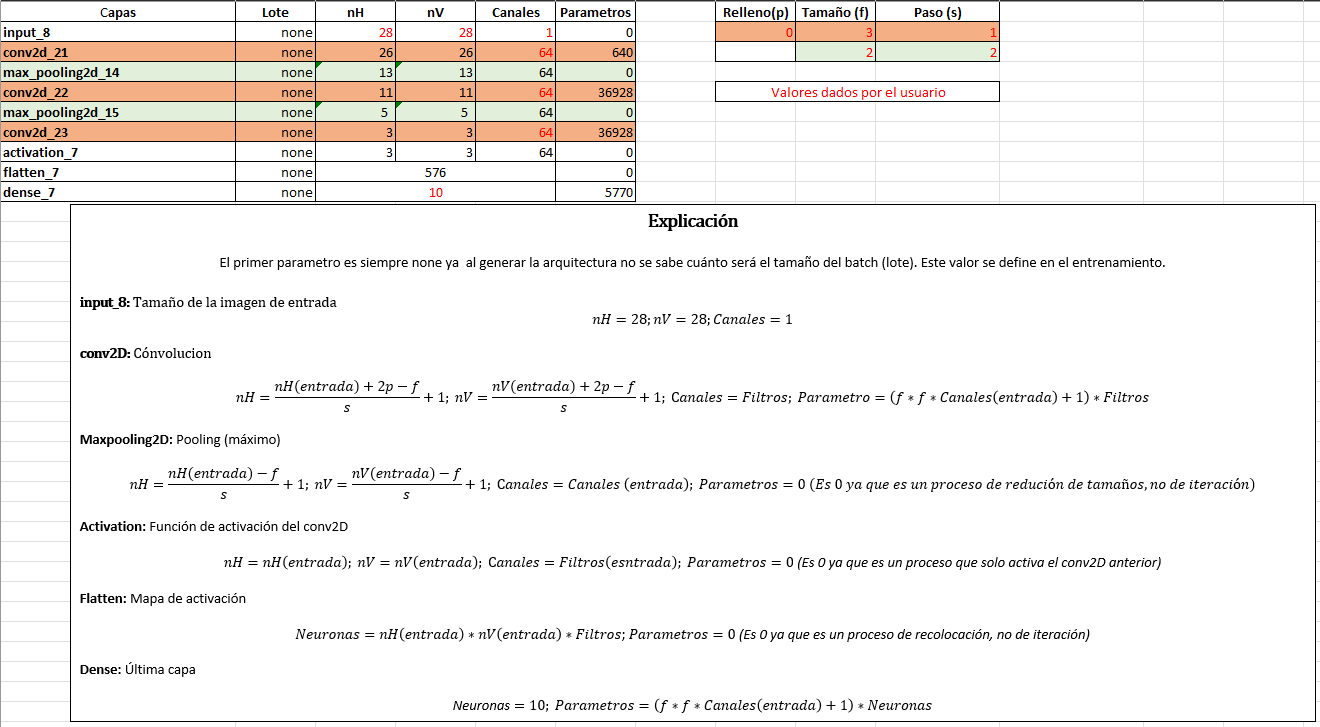

A continuación vamos a llamar a la función FIT para entrenar el modelo que acabamos de crear y vamos a guardar todo el historial del entrenamiento en la variable H. La primera entrada de la función fit es el conjunto de imágenes (recuerda que en nuestro caso es **x_train**), la segunda posición del fit son las etiquetas con codificación one-hot encoding (**y_train_onehot**). Además define:
- Un total de **10 épocas**.
- Un batch_size de **256 imágenes**.
- Verbose de **1**.
- Un split de validación del **20%**.
- Shuffle **True**.

In [ ]:
H = cnn.fit(x_train, y_train_onehot, epochs=10, batch_size=256, verbose=1, validation_split=0.2, shuffle='True')

Epoch 1/10
188/188 [==============================] - 4s 19ms/step - loss: 0.0139 - accuracy: 0.9952 - val_loss: 0.0128 - val_accuracy: 0.9960
Epoch 2/10
188/188 [==============================] - 2s 11ms/step - loss: 0.0102 - accuracy: 0.9965 - val_loss: 0.0251 - val_accuracy: 0.9906
Epoch 3/10
188/188 [==============================] - 2s 11ms/step - loss: 0.0092 - accuracy: 0.9967 - val_loss: 0.0282 - val_accuracy: 0.9917
Epoch 4/10
188/188 [==============================] - 2s 11ms/step - loss: 0.0123 - accuracy: 0.9962 - val_loss: 0.0261 - val_accuracy: 0.9916
Epoch 5/10
188/188 [==============================] - 2s 10ms/step - loss: 0.0092 - accuracy: 0.9967 - val_loss: 0.0245 - val_accuracy: 0.9930
Epoch 6/10
188/188 [==============================] - 2s 9ms/step - loss: 0.0051 - accuracy: 0.9983 - val_loss: 0.0310 - val_accuracy: 0.9925
Epoch 7/10
188/188 [==============================] - 2s 9ms/step - loss: 0.0076 - accuracy: 0.9973 - val_loss: 0.0398 - val_accuracy: 0.9901
E

Como ves, con CNN (80266 parámetros a entrenar) y 10 épocas hemos conseguido una exactitud con el conjunto de validación entre 0.98 y 0.99 (tiempo entrenamiento en torno a 21 s). En el entregable anterior, el resultado con MLP (118282 parámetros a entrenar) y 40 épocas estaba entre 0.96 y 0.97 (tiempo entrenamiento en torno a 38 s). El resultado ya era bueno pero lo hemos mejorado un poco más.

**PREGUNTA 2: ¿Qué representa en cada época el número 188?**

**RESPUESTA**: Numero de lotes, por cada epoca.


> Indented block



A continuacion vamos a analizar las gráficas del entrenamiento.

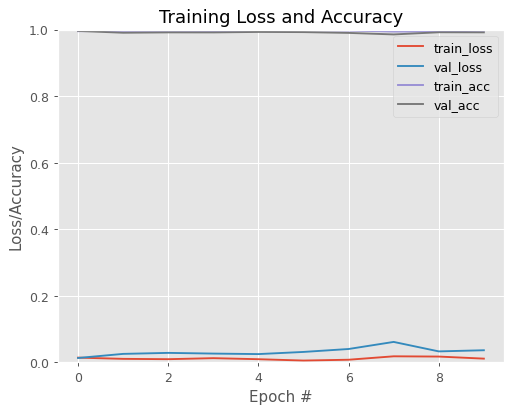

In [ ]:
# Gráficas
plt.style.use("ggplot")
plt.figure(dpi=90)
eje_x = np.arange(0, len(H.history['loss']))
plt.plot(eje_x, H.history["loss"], label="train_loss")
plt.plot(eje_x, H.history["val_loss"], label="val_loss")
plt.plot(eje_x, H.history["accuracy"], label="train_acc")
plt.plot(eje_x, H.history["val_accuracy"], label="val_acc")
plt.ylim(0, 1)
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()


#### **Resultados cuantitativos (modelo final)**

Viendo las gráficas anteriores parece que no hay subajuste o sobreajuste por lo que nos quedamos con este modelo. Ahora vamos a evaluar la calidad del modelo final realizando la predicción con todas las imágenes del conjunto de test.

In [ ]:
# Evaluación del modelo final
print("\n[INFO]: Evaluando el modelo final...")
# Efectuamos la predicción (empleamos el mismo valor de batch_size que en training). Para cada ejemplo, se obtiene la probabilidad para cada clase
predictions = cnn.predict(x_test, batch_size=256, verbose=1) # Utilizamos el mismo tamaño de batch que cuando realzamos el entrenamiento

# Sacamos la matriz de confusión y el report para el conjunto de datos test
from sklearn.metrics import classification_report, confusion_matrix
print("\n [INFO]: Matriz de confusión (test)")
print(confusion_matrix(y_test_onehot.argmax(axis=1), predictions.argmax(axis=1)))
print("\n[INFO]: Report (test)")
print(classification_report(y_test_onehot.argmax(axis=1), predictions.argmax(axis=1)))


[INFO]: Evaluando el modelo final...
40/40 [==============================] - 0s 6ms/step

 [INFO]: Matriz de confusión (test)
[[ 976    1    0    0    0    0    1    1    1    0]
 [   0 1128    1    2    0    0    0    2    2    0]
 [   1    0 1023    2    0    0    0    3    3    0]
 [   0    1    1 1007    0    0    0    0    1    0]
 [   0    0    1    0  972    0    1    2    1    5]
 [   0    0    0   10    0  875    2    1    1    3]
 [   4    2    2    1    1    2  945    0    1    0]
 [   0    3    4    0    0    0    0 1019    0    2]
 [   3    0    1    3    0    0    0    2  963    2]
 [   0    0    0    5    4    3    0    4    6  987]]

[INFO]: Report (test)
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.98      1.00      0.99      1010
           4       0.99      0.99      0.99    

Como ves tenemos una exactitud con el conjunto de test del 0.98-0.99 (antes con MLP teníamos 0.97).

#### **Resultados cualitativos (modelo final)**


 Vamos a predecir la imagen 0, que tiene como etiqueta real el número 7


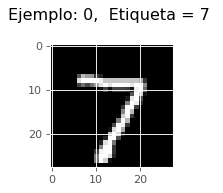



 Vamos a predecir la imagen 2, que tiene como etiqueta real el número 1


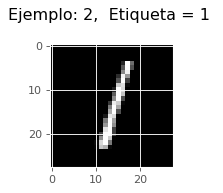

In [ ]:
# Función para visualizar un ejemplo (con su etiqueta)
def visualizar_digito(datos, etiquetas, num):
  plt.figure(figsize=(2, 2), dpi=80) # Esta línea es para que el plot sea más pequeño
  image = datos[num]
  label = etiquetas[num]
  # Mostrar
  plt.title('Ejemplo: %d,  Etiqueta = %d \n' % (num, label))
  plt.imshow(image, cmap='gray')
  plt.show()

# En primer lugar, convertimos las etiquetas predichas en one-hot encoding) a las etiquetas originales.
predictions_human_label = decodificar_onehot(predictions)

print('\n', 'Vamos a predecir la imagen 0, que tiene como etiqueta real el número', y_test[0])
visualizar_digito(x_test, predictions_human_label, 0)

print('\n\n', 'Vamos a predecir la imagen 2, que tiene como etiqueta real el número', y_test[2])
visualizar_digito(x_test, predictions_human_label, 2)

### **Programar una red neuronal por el MÉTODO SECUENCIAL**

Como sabes, no sólo se puede programar una red por el **MÉTODO FUNCIONAL** si no que también se pueden crear de forma secuencial, aunque para redes complejas no suele emplearse este método. Convierte el modelo creado en el funcional a los dos tipos de secuenciales.

In [ ]:
# Definiendo el modelo secuencial 1: Todo dentro de la misma secuencia separado por comas (,)

from tensorflow.keras import Input
from tensorflow.keras.layers import Activation, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam # Existen otros optimizadores como SGD y RMSprop

# Definiendo el modelo secuencial 1: Todo dentro de la misma secuencia separado por comas (,)
class CNN_Sequential_1:
  def build_model():
    model = tf.keras.models.Sequential([
            Input((28, 28, 1)),
            Conv2D(64, 3, activation='relu'),
            MaxPooling2D(2),
            Conv2D(64, 3, activation='relu'),
            MaxPooling2D(2),
            Conv2D(64, 3),
            Activation('relu'),
            Flatten(),
            Dense(10, activation='softmax')
            ])

    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

    return model


# Definiendo el modelo secuencial 2: Que trata de añadir cada capa a modelo.
class CNN_Sequential_2:
  def build_model():
    model = tf.keras.models.Sequential()
    model.add(Input((28, 28, 1)))
    model.add(Conv2D(64, 3, activation='relu'))
    model.add(MaxPooling2D(2))
    model.add(Conv2D(64, 3, activation='relu'))
    model.add(MaxPooling2D(2))
    model.add(Conv2D(64, 3))
    model.add(Activation('relu'))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

    return model


Veamos el summary de los modelos:

In [ ]:
cnn_sec_1 = CNN_Sequential_1.build_model()
cnn_sec_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 activation_1 (Activation)   (None, 3, 3, 64)          0

In [ ]:
cnn_sec_2 = CNN_Sequential_2.build_model()
cnn_sec_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 activation_2 (Activation)   (None, 3, 3, 64)         

Comprobemos que se entrena igual que en el modelo FUNCIONAL y que ofrece resultados similares.

In [ ]:
H_sec_1 = cnn_sec_1.fit(x_train, y_train_onehot, epochs=10, batch_size=256, verbose=1, validation_split=0.2, shuffle='True')

Epoch 1/10
188/188 [==============================] - 3s 10ms/step - loss: 0.9509 - accuracy: 0.8528 - val_loss: 0.1249 - val_accuracy: 0.9632
Epoch 2/10
188/188 [==============================] - 2s 9ms/step - loss: 0.0953 - accuracy: 0.9708 - val_loss: 0.0882 - val_accuracy: 0.9736
Epoch 3/10
188/188 [==============================] - 2s 10ms/step - loss: 0.0584 - accuracy: 0.9814 - val_loss: 0.0684 - val_accuracy: 0.9807
Epoch 4/10
188/188 [==============================] - 2s 9ms/step - loss: 0.0427 - accuracy: 0.9863 - val_loss: 0.0607 - val_accuracy: 0.9838
Epoch 5/10
188/188 [==============================] - 2s 10ms/step - loss: 0.0318 - accuracy: 0.9895 - val_loss: 0.0600 - val_accuracy: 0.9833
Epoch 6/10
188/188 [==============================] - 2s 10ms/step - loss: 0.0245 - accuracy: 0.9919 - val_loss: 0.0599 - val_accuracy: 0.9837
Epoch 7/10
188/188 [==============================] - 2s 9ms/step - loss: 0.0199 - accuracy: 0.9933 - val_loss: 0.0573 - val_accuracy: 0.9838
Ep

In [ ]:
H_sec_2 = cnn_sec_2.fit(x_train, y_train_onehot, epochs=10, batch_size=256, verbose=1, validation_split=0.2, shuffle='True')

Epoch 1/10
188/188 [==============================] - 4s 12ms/step - loss: 1.1874 - accuracy: 0.8334 - val_loss: 0.1277 - val_accuracy: 0.9606
Epoch 2/10
188/188 [==============================] - 2s 9ms/step - loss: 0.0993 - accuracy: 0.9693 - val_loss: 0.0958 - val_accuracy: 0.9712
Epoch 3/10
188/188 [==============================] - 2s 10ms/step - loss: 0.0623 - accuracy: 0.9799 - val_loss: 0.0734 - val_accuracy: 0.9790
Epoch 4/10
188/188 [==============================] - 2s 9ms/step - loss: 0.0472 - accuracy: 0.9855 - val_loss: 0.0663 - val_accuracy: 0.9794
Epoch 5/10
188/188 [==============================] - 2s 10ms/step - loss: 0.0357 - accuracy: 0.9876 - val_loss: 0.0684 - val_accuracy: 0.9800
Epoch 6/10
188/188 [==============================] - 2s 9ms/step - loss: 0.0274 - accuracy: 0.9910 - val_loss: 0.0631 - val_accuracy: 0.9827
Epoch 7/10
188/188 [==============================] - 2s 11ms/step - loss: 0.0235 - accuracy: 0.9921 - val_loss: 0.0503 - val_accuracy: 0.9866
Ep

In [ ]:
# Sacamos el report para el conjunto de datos de test del modelo secuencial 1
predictions_sec_1 = cnn_sec_1.predict(x_test, batch_size=256, verbose=1)
print("\n[INFO]: Report (test, secuencial 1)")
print(classification_report(y_test_onehot.argmax(axis=1), predictions_sec_1.argmax(axis=1)))

40/40 [==============================] - 0s 2ms/step

[INFO]: Report (test, secuencial 1)
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.97      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
# Sacamos el report para el conjunto de datos de test del modelo secuencial 2
predictions_sec_2 = cnn_sec_2.predict(x_test, batch_size=256, verbose=1)
print("\n[INFO]: Report (test, secuencial 2)")
print(classification_report(y_test_onehot.argmax(axis=1), predictions_sec_2.argmax(axis=1)))

40/40 [==============================] - 0s 3ms/step

[INFO]: Report (test, secuencial 2)
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



## **<u>Ejercicio 2: CONJUNTO DE DATOS CIFAR10</u>**

Ahora vamos a probar con el conjunto de datos de CIFAR10.

In [1]:
# Reinicia entorno de ejecución (Entorno de ejecución -> Reiniciar entorno de ejecución)

# Cargamos el dataset
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Como éste es un dataset conocido, vamos a ponerle su etiqueta escrita, en lugar de la numérica con la que viene.
etiquetas_humanas = ["Avión", "Automóvil", "Pájaro", "Gato", "Ciervo", "Perro", "Rana", "Caballo", "Barco", "Camión"]

170498071/170498071 [==============================] - 10s 0us/step


1) Puedes empezar a crear la clase y generar tu red neuronal CNN para resolver el problema de clasificación de CIFAR10 copiando una de las arquitecturas del Ejercicio 1 en la siguiente celda. Puedes usar el método que más cómodo te sea: El FUNCIONAL o el SECUENCIAL (1 o 2). Cambia lo que sea necesario (recuerda que y_train, y_test están en _label encoding_ y no puedes usar la función de pérdida _'categorical_crossentropy'_...). Además de copiar la clase (renómbrala como _CNN_CIFAR10_), recuerda importar las librerías/funciones que necesites (ya que hemos reiniciado el entorno de ejecución), construir el modelo, entrenarlo, mirar las gráficas de entrenamiento, ...  **IMPORTANTE: No ejecutes un _fit_ después de haber ejecutado otro _fit_ porque no inicializa los pesos (cogería los pesos... del ajuste anterior), tienes que ejecutar antes _build_model_.**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.layers import Activation, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam # Existen otros optimizadores como SGD y RMSprop

class CNN():

  def build_model():

    inputs = Input((32, 32, 3)) # Función de entrada donde definimos el tamaño del vector o imagen de entrada

    conv = Conv2D(64, 3, activation='relu')(inputs) # Primera capa convolucional
    maxPooling = MaxPooling2D(2)(conv) # Max pooling
    conv = Conv2D(64, 3, activation ='relu')(maxPooling) # Segunda capa convolucional
    maxPooling = MaxPooling2D(2)(conv) # Max pooling
    conv = Conv2D(64,3 )(maxPooling) # Tercera capa convolucional
    conv = Activation('relu')(conv) # Activación de la tercera capa convolucional
    flat = Flatten()(conv) # Capa para convertir los mapas de activación en un vector (una dimensión)

    output = Dense(10, activation='softmax')(flat) # Capa de salida

    model = Model(inputs=inputs , outputs=output) # Se genera el modelo

    # Se compila el modelo donde se dice qué optimizador (con qué tasa de aprendizaje), función de pérdidas y métricas usaremos
    model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model


In [5]:
cnn1 = CNN.build_model()
cnn1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928 

In [6]:
H1 = cnn1.fit(x_train, y_train, epochs=10, batch_size=256, verbose=1, validation_split=0.2, shuffle='True')

Epoch 1/10
157/157 [==============================] - 93s 584ms/step - loss: 3.6551 - accuracy: 0.2190 - val_loss: 1.8036 - val_accuracy: 0.3379
Epoch 2/10
157/157 [==============================] - 96s 614ms/step - loss: 1.6424 - accuracy: 0.3985 - val_loss: 1.5802 - val_accuracy: 0.4252
Epoch 3/10
157/157 [==============================] - 97s 620ms/step - loss: 1.4899 - accuracy: 0.4587 - val_loss: 1.4511 - val_accuracy: 0.4805
Epoch 4/10
157/157 [==============================] - 92s 587ms/step - loss: 1.4071 - accuracy: 0.4927 - val_loss: 1.4156 - val_accuracy: 0.4946
Epoch 5/10
157/157 [==============================] - 92s 587ms/step - loss: 1.3303 - accuracy: 0.5201 - val_loss: 1.3573 - val_accuracy: 0.5188
Epoch 6/10
157/157 [==============================] - 92s 586ms/step - loss: 1.2725 - accuracy: 0.5452 - val_loss: 1.3414 - val_accuracy: 0.5277
Epoch 7/10
157/157 [==============================] - 90s 573ms/step - loss: 1.2364 - accuracy: 0.5612 - val_loss: 1.3477 - val_ac

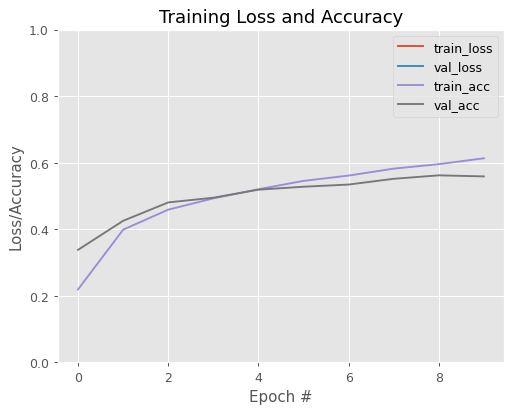

In [8]:
# Gráficas
plt.style.use("ggplot")
plt.figure(dpi=90)
eje_x = np.arange(0, len(H1.history['loss']))
plt.plot(eje_x, H1.history["loss"], label="train_loss")
plt.plot(eje_x, H1.history["val_loss"], label="val_loss")
plt.plot(eje_x, H1.history["accuracy"], label="train_acc")
plt.plot(eje_x, H1.history["val_accuracy"], label="val_acc")
plt.ylim(0, 1)
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()


2) Cuando lo entrenes vas a ver que obtienes una exactitud con el conjunto de validación alrededor de 0.60. Pero, un momento, ¿has normalizado el conjunto de datos CIFAR10 como lo hiciste en el caso de MLP? Hazlo creando las variables x_train_norm y x_test_norm, y entrena tu CNN con x_train_norm.
<br>
<br>

In [3]:
x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0

class CNN():

  def build_model():

    inputs = Input((32, 32, 3)) # Función de entrada donde definimos el tamaño del vector o imagen de entrada

    conv = Conv2D(64, 3, activation='relu')(inputs) # Primera capa convolucional
    maxPooling = MaxPooling2D(2)(conv) # Max pooling
    conv = Conv2D(64, 3, activation ='relu')(maxPooling) # Segunda capa convolucional
    maxPooling = MaxPooling2D(2)(conv) # Max pooling
    conv = Conv2D(64,3 )(maxPooling) # Tercera capa convolucional
    conv = Activation('relu')(conv) # Activación de la tercera capa convolucional
    flat = Flatten()(conv) # Capa para convertir los mapas de activación en un vector (una dimensión)

    output = Dense(10, activation='softmax')(flat) # Capa de salida

    model = Model(inputs=inputs , outputs=output) # Se genera el modelo

    # Se compila el modelo donde se dice qué optimizador (con qué tasa de aprendizaje), función de pérdidas y métricas usaremos
    model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

In [7]:
cnn2 = CNN.build_model()
cnn2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928 

In [11]:
H2 = cnn2.fit(x_train_norm, y_train, epochs=10, batch_size=256, verbose=1, validation_split=0.2, shuffle='True')

Epoch 1/10
157/157 [==============================] - 107s 679ms/step - loss: 1.7685 - accuracy: 0.3568 - val_loss: 1.5509 - val_accuracy: 0.4351
Epoch 2/10
157/157 [==============================] - 93s 593ms/step - loss: 1.4478 - accuracy: 0.4783 - val_loss: 1.4554 - val_accuracy: 0.4801
Epoch 3/10
157/157 [==============================] - 94s 598ms/step - loss: 1.3381 - accuracy: 0.5237 - val_loss: 1.3691 - val_accuracy: 0.5098
Epoch 4/10
157/157 [==============================] - 95s 605ms/step - loss: 1.2479 - accuracy: 0.5584 - val_loss: 1.2584 - val_accuracy: 0.5496
Epoch 5/10
157/157 [==============================] - 97s 619ms/step - loss: 1.1830 - accuracy: 0.5833 - val_loss: 1.1937 - val_accuracy: 0.5865
Epoch 6/10
157/157 [==============================] - 94s 597ms/step - loss: 1.1205 - accuracy: 0.6062 - val_loss: 1.1272 - val_accuracy: 0.6042
Epoch 7/10
157/157 [==============================] - 102s 649ms/step - loss: 1.0700 - accuracy: 0.6249 - val_loss: 1.0918 - val_

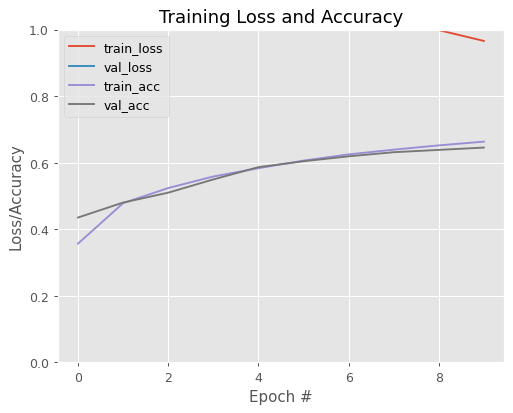

In [12]:
# Gráficas
plt.style.use("ggplot")
plt.figure(dpi=90)
eje_x = np.arange(0, len(H2.history['loss']))
plt.plot(eje_x, H2.history["loss"], label="train_loss")
plt.plot(eje_x, H2.history["val_loss"], label="val_loss")
plt.plot(eje_x, H2.history["accuracy"], label="train_acc")
plt.plot(eje_x, H2.history["val_accuracy"], label="val_acc")
plt.ylim(0, 1)
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()


3) Después de entrenar con x_train_norm y 10 épocas ahora tendrás una exactitud con el conjunto de validación de alrededor de 0.65. Además, verás en la gráfica del error (_loss_)/exactitud del conjunto de entrenamiento/validación que parece que un siguiente paso sería incrementar el número de épocas (por ejemplo, a 60 épocas) porque parece que hay subajuste. Antes de ejecutarlo, vamos a cambiar la línea de cuando se entrena la red por las siguientes líneas:

**from tensorflow.keras.callbacks import ModelCheckpoint**

**mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)**

**H = cnn_CIFAR10.fit(x_train_norm, y_train, epochs=60, batch_size=256, verbose=1, validation_split=0.2, shuffle=True, callbacks=mc)**

**from tensorflow.keras.models import load_model**

**saved_model = load_model('best_model.h5')**

**ini = int(len(y_train)*0.8)**

**fin = len(y_train)**

**x_val_norm = x_train_norm[ini:fin]**

**y_val = y_train[ini:fin]**

**loss_val, accuracy_val = saved_model.evaluate(x_val_norm, y_val, batch_size=256, verbose=1)**

**print('\n [INFO]: Accuracy (validation set) %.4f\n' %accuracy_val)**
<br>
<br>

Además vamos a incrementar el límite del eje vertical de la gráfica haciendo **plt.ylim(0, 2)**

Pero ¿qué hacen esas líneas que has copiado antes?
*   Las tres primeras líneas lo que hacen es entrenar la red CNN durante 50 épocas pero guarda el modelo que tenga menor error (_loss_) con el conjunto de validación en _best_model.h5_.
*   Si queremos saber la exactitud de ese _mejor modelo_, podemos obtenerla  mirando línea a línea el entrenamiento pero nosotros lo vamos a hacer de otra forma. Vamor a cargar ese _mejor modelo_ (ya que cnn_CIFAR10 corresponde al modelo de la última época) y obtenemos las prediciones del conjunto de validación con ese _mejor modelo_. Las líneas 4-5 cargan ese _mejor modelo_. Las líneas 6-9 construyen el conjunto de datos de validación (el último 20% de los datos del conjunto x_train). Las líneas 10-11 calculan el error (_loss_) y la exactitud con el conjunto de validación y el _mejor modelo_, y muestran el resultado de la exactitud por pantalla.

<br>
Con este best_model tendrías que tener una exactitud con el conjunto de validación alrededor de 0.71. ¡Genial! Hemos subido de una exactitud con MLP y el conjunto de validación de 0.52 a una exactitud de 0.71 con CNN.
<br>
<br>
Introduce el código implementado en la siguiente celda:

In [8]:
from tensorflow.keras.callbacks import ModelCheckpoint

mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)

H3 = cnn2.fit(x_train_norm, y_train, epochs=60, batch_size=256, verbose=1, validation_split=0.2, shuffle=True, callbacks=mc)

from tensorflow.keras.models import load_model

saved_model = load_model('best_model.h5')

ini = int(len(y_train)*0.8)

fin = len(y_train)

x_val_norm = x_train_norm[ini:fin]

y_val = y_train[ini:fin]

loss_val, accuracy_val = saved_model.evaluate(x_val_norm, y_val, batch_size=256, verbose=1)

print('\n [INFO]: Accuracy (validation set) %.4f\n' %accuracy_val)

Epoch 1/60
157/157 [==============================] - 14s 17ms/step - loss: 1.7798 - accuracy: 0.3514 - val_loss: 1.5761 - val_accuracy: 0.4206
Epoch 2/60
 12/157 [=>............................] - ETA: 1s - loss: 1.5283 - accuracy: 0.4486

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


157/157 [==============================] - 2s 12ms/step - loss: 1.4366 - accuracy: 0.4836 - val_loss: 1.3937 - val_accuracy: 0.4992
Epoch 3/60
157/157 [==============================] - 2s 12ms/step - loss: 1.3156 - accuracy: 0.5325 - val_loss: 1.2808 - val_accuracy: 0.5446
Epoch 4/60
157/157 [==============================] - 2s 14ms/step - loss: 1.2340 - accuracy: 0.5630 - val_loss: 1.2126 - val_accuracy: 0.5715
Epoch 5/60
157/157 [==============================] - 2s 14ms/step - loss: 1.1695 - accuracy: 0.5866 - val_loss: 1.1508 - val_accuracy: 0.5917
Epoch 6/60
157/157 [==============================] - 2s 12ms/step - loss: 1.1086 - accuracy: 0.6094 - val_loss: 1.1134 - val_accuracy: 0.6066
Epoch 7/60
157/157 [==============================] - 2s 12ms/step - loss: 1.0638 - accuracy: 0.6259 - val_loss: 1.1237 - val_accuracy: 0.6083
Epoch 8/60
157/157 [==============================] - 2s 13ms/step - loss: 1.0190 - accuracy: 0.6434 - val_loss: 1.0768 - val_accuracy: 0.6232
Epoch 9/60

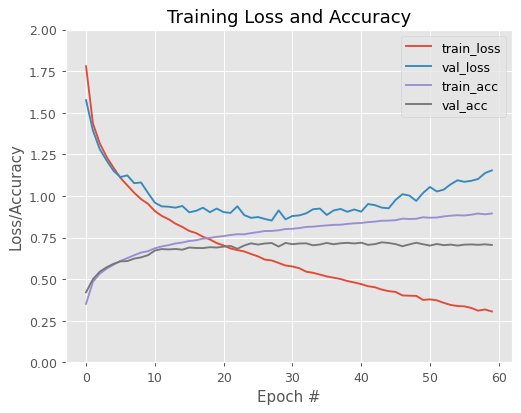

In [9]:
# Gráficas
plt.style.use("ggplot")
plt.figure(dpi=90)
eje_x = np.arange(0, len(H3.history['loss']))
plt.plot(eje_x, H3.history["loss"], label="train_loss")
plt.plot(eje_x, H3.history["val_loss"], label="val_loss")
plt.plot(eje_x, H3.history["accuracy"], label="train_acc")
plt.plot(eje_x, H3.history["val_accuracy"], label="val_acc")
plt.ylim(0, 2)
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

**PREGUNTA 3: ¿Qué ha ocurrido al entrenar con 60 épocas (por qué nos hemos quedado con best_model)? Antes de responder, analiza la gráfica del error (_loss_)/exactitud del conjunto de entrenamiento/validación.**

**RESPUESTA**: De las gráficas se desprende que hay sobreajunte. Pero el programa no se detiene ya que escoje aquel modelo que mejor valor de error da del conjunto de validación
<br>
<br>
Pero te preguntarás si podemos tener una exactitud con el conjunto de validación por encima del 90%. La respuesta es sí, por ejemplo, haciendo _Transfer Learning_ con una arquitectura _ResNet50_ y utilizando el optimizador SGD (_Gradient descent, with momentum, optimizer_) . Ejecuta el siguiente código pero ármate un poco de paciencia porque entrenar la red con 3 épocas te llevará alrededor 20 minutos.

94765736/94765736 [==============================] - 4s 0us/step
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 up_sampling2d (UpSampling2  (None, 224, 224, 3)       0         
 D)                                                              
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                            

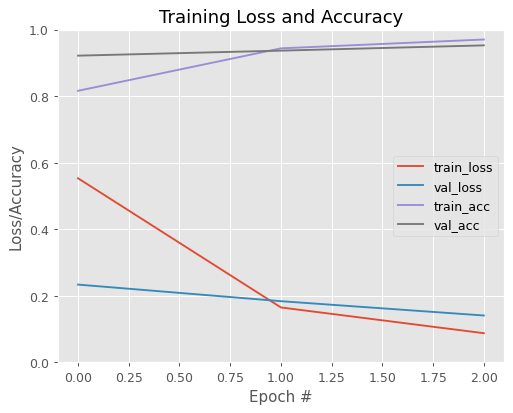

In [10]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.optimizers import SGD

# Normalizamos el conjunto de datos de entrenamiento y el de test de la misma forma que se normalizó el modelo ResNet50 que se va a cargar
# En https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet50/preprocess_input puedes ver cómo se realiza esta normalización
# "The images are converted from RGB to BGR, then each color channel is zero-centered with respect to the ImageNet dataset, without scaling"
x_train_normResNet50 = tf.keras.applications.resnet50.preprocess_input(x_train.astype('float32'))
x_test_normResNet50 = tf.keras.applications.resnet50.preprocess_input(x_test.astype('float32'))

'''
CLASE PARA HACER TRANSFER LEARNING CON RESNET50 (ENTRENADO CON IMAGENET)
'''
class TL_CIFAR10():

  def build_model():

    ## Extracción de características (Este procesado se hace con el modelo de ResNet50 )
    inputs = tf.keras.layers.Input(shape=(32,32,3))
    resize = tf.keras.layers.UpSampling2D(size=(7,7))(inputs) # Se cambia el tamaño de cada imagen porque el modelo ResNet50 se entrenó con imágenes de tamaño (224,224,3)
    baseModel = tf.keras.applications.ResNet50(input_shape=(224, 224, 3), include_top=False, weights='imagenet') # include_top=False para no cargar las capas de clasificación (fully-connected layer)

    for i, layer in enumerate(baseModel.layers):
      nombreCapa = layer.name
      if '_bn' in nombreCapa:
         # Se va a realizar un ajuste fino de los parámetros de las capas de ResNet50 (sin capas de clasificación) excepto en las capas de batch normalization
         # Esta línea es para dejar congeladas las capas de batch normalization y así no se actualiza la media ni la varianza cuando se normalizan las entradas de estas capas
         layer.trainable = False

    # baseModel.summary()
    featureExtractor=baseModel(resize)

    ## Clasificador
    # La siguiente capa realiza una media de todos los píxeles de cada mapa de activación (entrada). El tamaño de la entrada es (None, nh, nv, nf) y el de la salida es (None, nf)
    # Global average pooling es como un regularizador estructural
    classification = tf.keras.layers.GlobalAveragePooling2D()(featureExtractor)
    classification = tf.keras.layers.Flatten()(classification) # Capa para convertir los mapas de activación en un vector (una dimensión)
    classification = tf.keras.layers.Dense(1024, activation="relu")(classification) # Primera capa fully-connected con 1024 neuronas (como las que se utilizan en MLP)
    classification = tf.keras.layers.Dense(512, activation="relu")(classification) # Segunda capa fully-connected con 512 neuronas
    output = tf.keras.layers.Dense(10, activation="softmax", name="classification")(classification) # Capa de salida con 10 neuronas porque queremos clasificar en 10 clases

    model = tf.keras.Model(inputs=inputs, outputs=output) # Se genera el modelo

    # Se compila el modelo con el optimizador SGD. Por defecto, tasa de aprendizaje 0.01 y momento (parámetro beta de diapositiva 36 de MLP) 0.0 (equivale a descenso de gradiente)
    model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

    return model

tl_CIFAR10 = TL_CIFAR10.build_model()
tl_CIFAR10.summary()
H = tl_CIFAR10.fit(x_train_normResNet50, y_train, epochs=3, batch_size=64, verbose=1, validation_split=0.2, shuffle=True)

# Gráficas
plt.style.use("ggplot")
plt.figure(dpi=90)
eje_x = np.arange(0, len(H.history['loss']))
plt.plot(eje_x, H.history["loss"], label="train_loss")
plt.plot(eje_x, H.history["val_loss"], label="val_loss")
plt.plot(eje_x, H.history["accuracy"], label="train_acc")
plt.plot(eje_x, H.history["val_accuracy"], label="val_acc")
plt.ylim(0, 1)
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

Ahora que ya tenemos nuestro modelo final (exactitud con el conjunto de validación alrededor de 0.95), vamos a evaluarlo con el conjunto de test.

[INFO]: Evaluando el modelo final...
157/157 [==============================] - 29s 182ms/step

[INFO]: Report (test)
              precision    recall  f1-score   support

       Avión       0.95      0.96      0.96      1000
   Automóvil       0.94      0.99      0.97      1000
      Pájaro       0.91      0.96      0.93      1000
        Gato       0.93      0.85      0.89      1000
      Ciervo       0.95      0.95      0.95      1000
       Perro       0.92      0.92      0.92      1000
        Rana       0.98      0.97      0.97      1000
     Caballo       0.95      0.97      0.96      1000
       Barco       0.96      0.97      0.97      1000
      Camión       0.98      0.94      0.96      1000

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000

[INFO]: Matriz de confusión (test)

[[960   2  12   0   2   0   0   2  20   2]
 [  1 987   0   0   0   0   0   0   2  10]
 

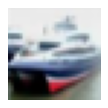

In [11]:
# Evaluación del modelo final
print("[INFO]: Evaluando el modelo final...")

# Efectuamos la predicción (empleamos x_test_normResNet50 y el mismo valor de batch_size que en training)
predictions = tl_CIFAR10.predict(x_test_normResNet50, batch_size=64, verbose=1)
predictions_labelEncoding = predictions.argmax(axis=1)
y_testSqueeze = y_test.squeeze() # Para pasar de tamaño (10000,1) a tamaño (10000,)

# Sacamos el report para test\n",
from sklearn.metrics import classification_report, confusion_matrix
print("\n[INFO]: Report (test)")
print(classification_report(y_testSqueeze, predictions_labelEncoding, target_names=etiquetas_humanas))

print("[INFO]: Matriz de confusión (test)\n")
print(confusion_matrix(y_testSqueeze, predictions_labelEncoding))

# Probamos una imagen de test
numImagen = 1
print('\n\nClase de la imagen', numImagen, '(real, etiqueta humana): ', etiquetas_humanas[int(y_testSqueeze[numImagen])])
print('Clase de la imagen', numImagen, '(predecida, etiqueta humana): ', etiquetas_humanas[int(predictions_labelEncoding[numImagen])])
# Visualización de la imagen
fig = plt.figure(figsize=(1.5, 1.5), dpi=80)
plt.axis('off')
plt.imshow(x_test[numImagen,:,:,:])
plt.show()

Tendrías que tener una exactitud con el conjunto de test alrededor de 0.95.